Compare 3 different files (Adapt paths!)

In [40]:
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
# load data sets
prefix = "/home/g/wikibase/wikidata-20190729-all-item-filtered-sorted-1in1000-test-r1-"
groupBy = ["setSize","numTypes","numLeftOut","numNonTypes"][3]
evalStrategy = [
    "takeOneButType", # take one out except type
    "takeAllButBest", # take all best except number of types
    "takeMoreButCommon", # take iteratively more bust the most common non-type prop
    "handlerTakeButType", # take all but types
    "historicTakeButType" # original workings of take all but types
][0]
                               
df_recommender   = pd.read_csv(prefix+"standard-"+evalStrategy+"-"+groupBy+"-stats.csv",encoding = "ISO-8859-1", skipinitialspace=True)
df_typed         = pd.read_csv(prefix+"typed-"+evalStrategy+"-"+groupBy+"-stats.csv",encoding = "ISO-8859-1", skipinitialspace=True)
df_typed_backoff = pd.read_csv(prefix+"typed-tooFewRecs-"+evalStrategy+"-"+groupBy+"-stats.csv",encoding = "ISO-8859-1", skipinitialspace=True)
df_wikisuggester = pd.read_csv(prefix+"wikidata-"+evalStrategy+"-"+groupBy+"-stats.csv",encoding = "ISO-8859-1", skipinitialspace=True)


#extend information
df_recommender['Recommender']='Standard'
df_typed['Recommender']='Typed'
df_typed_backoff['Recommender']='Typed and Backoff'
df_wikisuggester['Recommender']='PropertySuggester' 

#concat
df_combined = pd.concat([
    df_recommender,
    df_typed,
    df_typed_backoff,
    df_wikisuggester
])

#filter the aggregated columns
group = df_combined.columns[0]
aggregated = df_combined[df_combined[group]==-1]
df_combined = df_combined[df_combined[group] >=0]
# print(df_combined[:10])

In [41]:
aggregated

,numNonTypes,subjects,duration,mean,meanOfHits,median,stddev,top1,top5,top10,topL,recall,precision,precisionAtL,Recommender
0,-1,451473,9.8232,16.7802,3.5191,1.0,81.5711,77.7484,90.0229,92.8339,77.7484,97.3292,NaN,77.7484,Standard
0,-1,456819,4.6526,18.7433,2.6183,1.0,88.8837,79.2535,91.3381,93.8518,79.2535,96.7580,NaN,79.2535,Typed
0,-1,456929,5.5257,5.0500,3.2671,1.0,33.6249,80.3661,93.0298,95.8158,80.3661,99.6411,NaN,80.3661,Typed and Backoff
0,-1,456870,31.7659,74.1062,3.1026,1.0,174.1513,63.0969,77.9764,81.2432,63.0969,85.7106,NaN,63.0969,PropertySuggester


DataError: No numeric types to aggregate

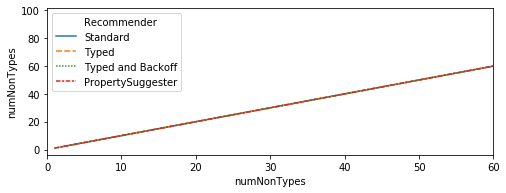

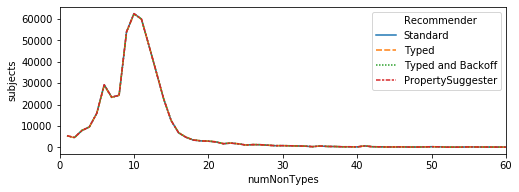

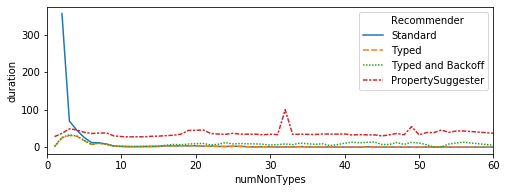

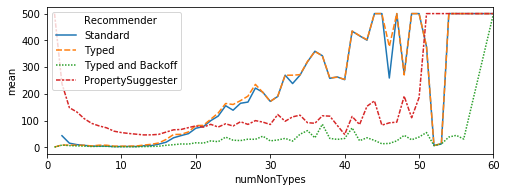

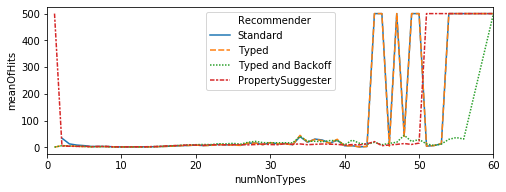

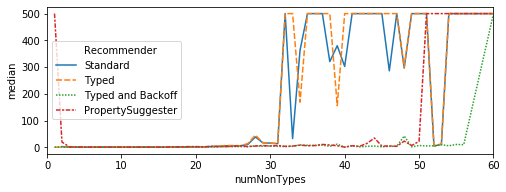

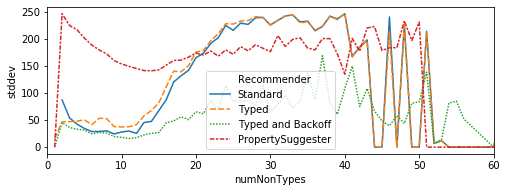

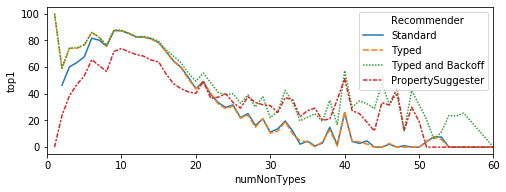

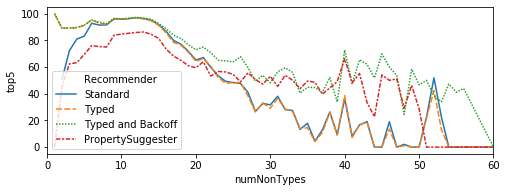

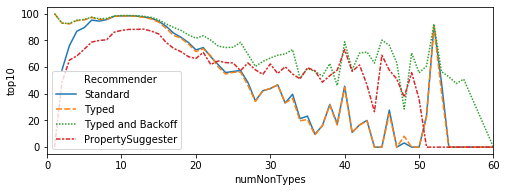

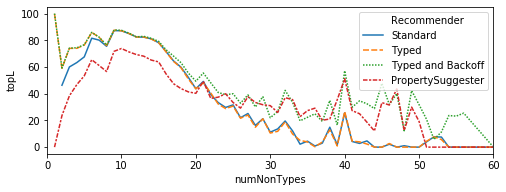

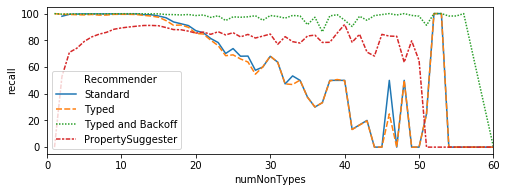

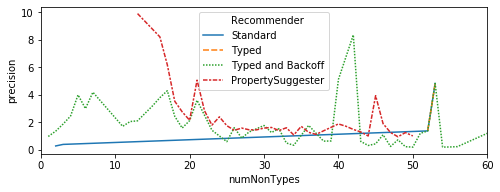

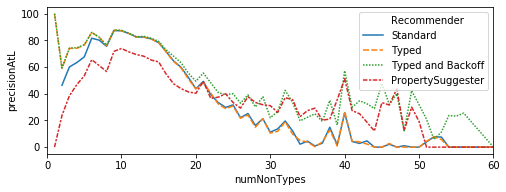

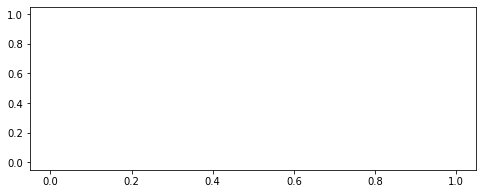

In [42]:
#plot
for column in df_combined:
    #if column 
    figure(num=None, figsize=(8, 3))
    g = sns.lineplot(x=group, y=column, hue="Recommender",data=df_combined, style ="Recommender")
    g.axes.set_xlim(0,60)
    plt.subplots_adjust(bottom=0.2)
    plt.savefig(column, dpi=300)
